In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/test.csv


In [2]:
df = pd.read_csv('../input/fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
df.shape

(20800, 5)

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

droping null values

In [6]:
df.dropna(subset=['text'],inplace=True)

In [7]:
df.isnull().sum()

id           0
title      558
author    1918
text         0
label        0
dtype: int64

In [8]:
df.fillna('""',inplace=True)
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

### putting title and text together

In [9]:
df['target'] = df['title']+ ' '+df['text']
df.head()

,id,title,author,text,label,target
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [10]:
df.groupby('label').size()

label
0    10387
1    10374
dtype: int64

so it is balanced

In [11]:
df_train = df[['author','target','label']]
df_train.head()

,author,target,label
0,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Daniel J. Flynn,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Consortiumnews.com,Why the Truth Might Get You Fired Why the Trut...,1
3,Jessica Purkiss,15 Civilians Killed In Single US Airstrike Hav...,1
4,Howard Portnoy,Iranian woman jailed for fictional unpublished...,1


In [12]:
X = df_train[['target']].values
y = df_train['label'].values

### getting test data frame

In [13]:
df_test = pd.read_csv('../input/fake-news/test.csv')
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [14]:
df_test.shape

(5200, 4)

In [15]:
df_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [16]:
df_test.fillna('""',inplace=True)

In [17]:
df_test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [18]:
df_test['target'] = df_test['title']+ ' '+df_test['text']
df_test = df_test[['author','target']]

In [19]:
df_test.isnull().sum()

author    0
target    0
dtype: int64

In [20]:
df_test.head()

,author,target
0,David Streitfeld,"Specter of Trump Loosens Tongues, if Not Purse..."
1,"""""",Russian warships ready to strike terrorists ne...
2,Common Dreams,#NoDAPL: Native American Leaders Vow to Stay A...
3,Daniel Victor,"Tim Tebow Will Attempt Another Comeback, This ..."
4,Truth Broadcast Network,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...


In [21]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

### we need only targets

In [22]:
df_temp = df_train.drop(columns=['author','label'])
df_res = pd.concat([df_temp,df_test.drop(columns=['author'])],ignore_index=True)
df_res.drop(columns=['index'],inplace=True)
df_res.head()

,target
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired Why the Trut...
3,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...


In [24]:
df_res.shape

(25961, 1)

### lentgh of train data frame

In [26]:
l_end = df_train.shape[0]

In [27]:
import nltk

### preprocess function
for example it removes punctuations and remove less important words, at the end stem all the words

In [28]:
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
def preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

**this is a statistical method function(TfidfVectorizer) that Convert a collection of raw documents to a matrix of TF-IDF features.**

In [29]:
textFeatures = df_res['target'].copy()
textFeatures = textFeatures.apply(preprocess)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass input=english as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


our sparse matrix

In [30]:
features

<25961x200780 sparse matrix of type '<class 'numpy.float64'>'
	with 6810596 stored elements in Compressed Sparse Row format>

train matrix

In [31]:
X = features[0:l_end]

In [32]:
X.shape

(20761, 200780)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga').fit(X_train,y_train)
y_predict = LR.predict(X_test)

### metrics

acc score is:  0.9614736335179388
[[1980   74]
 [  86 2013]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2099
           1       0.96      0.96      0.96      2054

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153

f1-score is:  0.9614745181380275


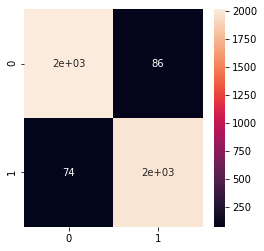

ROC-AUC Score is:  0.9615004223738943


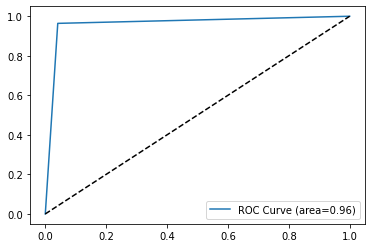

In [35]:
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, f1_score
print('acc score is: ',accuracy_score(y_test,y_predict))

print(confusion_matrix(y_test, y_predict, labels=[1,0]))
print (classification_report(y_test, y_predict))

print('f1-score is: ',f1_score(y_test, y_predict, average='weighted'))

import seaborn as sns
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

from sklearn.metrics import roc_auc_score, roc_curve
score = roc_auc_score(y_test, y_predict)
print('ROC-AUC Score is: ', score)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

### use logistic regression on train set and predict the test set

In [36]:
LR = LogisticRegression(solver='saga').fit(X,y)
y_predict_test = LR.predict(features[l_end:])

In [37]:
y_predict_test.shape

(5200,)

In [38]:
y_predict_test

array([0, 1, 1, ..., 0, 1, 0])

In [39]:
test = pd.read_csv('../input/fake-news/submit.csv')
test.shape

(5200, 2)

In [40]:
test.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


#### our prediction on test set

In [41]:
test['label'] = y_predict_test

In [42]:
test.set_index('id',inplace=True)
# test.index.names=[None]
test

,label
id,
20800,0
20801,1
20802,1
20803,0
20804,1
...,...
25995,1
25996,0
25997,0


In [43]:
test.to_csv('submission.csv')

In [ ]:
#end